In [1]:
from qutip import *
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

In [2]:
def psi(g,e):
    return np.array([g, e])

#def pulse(t, Omega0, delPrime):
#    Omega = np.sqrt(Omega0**2 + delPrime**2)
#    
#    return np.array([[np.cos(Omega*t/2.0) -(1.0j*delPrime/Omega)*np.sin(Omega*t/2.0), (1.0j*Omega0/Omega)*np.sin(Omega*t/2.0)],
#             [(1.0j*Omega0/Omega)*np.sin(Omega*t/2.0) , np.cos(Omega*t/2.0) + (1.0j*delPrime/Omega)*np.sin(Omega*t/2.0)]])

def pulse(t, Omega0, delta, phi0, phi1):
    Omega = np.sqrt(Omega0**2 + delta**2)
    
    if Omega == 0.0:
        U = np.array([[1.0 , 0.0],
                      [0.0 , 1.0]])
        
    else:
        U = np.array([[np.cos(Omega*t/2.0) -(1.0j*delta/Omega)*np.sin(Omega*t/2.0), (1.0j*Omega0/Omega)*np.sin(Omega*t/2.0)],
                     [(1.0j*Omega0/Omega)*np.sin(Omega*t/2.0) , np.cos(Omega*t/2.0) + (1.0j*delta/Omega)*np.sin(Omega*t/2.0)]])
    
    V1 = np.array([[1.0 , 0.0],
                   [0.0 , np.exp(-1.0j*phi1)]])
    
    V0 = np.array([[1.0 , 0.0],
                   [0.0 , np.exp(1.0j*phi0)]])
    
    return np.exp(1.0j*delta*t/2.0)*V1@U@V0

def rhoee(psi):
    return (abs(psi[1]))**2.0

def rhogg(psi):
    return (abs(psi[0]))**2.0

def phi(psi):
    phi0 = math.atan2(np.real(psi[0]),np.imag(psi[0]))
    phi1 = math.atan2(np.real(psi[1]),np.imag(psi[1]))
    return (phi0-phi1)

def blochVec(psi):
    w = rhogg(psi) - rhoee(psi)  #pointed up is ground state
    if abs(w)>1.0:
        w = float(round(w))
    x = np.sin(np.arccos(w))*np.cos(phi(psi))
    y = np.sin(np.arccos(w))*np.sin(phi(psi))
    return np.array([x,y,w])

In [3]:
def hyperRamseyP(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02):
    #pulse(t, Omega0, delta, phi0, phi1):
    pulse1 = pulse(t1, Omega01, delPrime, 0.0, 0.0)
    pulse2 = pulse(t2, Omega02, delPrime, 0.0, 0.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, np.pi/2.0) 
    
    return pulse2@freeEvo@pi2PhaseInj@pulse1@psi0

def hyperRamseyM(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02):
    #pulse(t, Omega0, delta, phi0, phi1):
    pulse1 = pulse(t1, Omega01, delPrime, 0.0, 0.0)
    pulse2 = pulse(t2, Omega02, delPrime, 0.0, 0.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, -np.pi/2.0) 
    
    return pulse2@freeEvo@pi2PhaseInj@pulse1@psi0

def HRerrSig(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02):
    RhoeeP = rhoee(hyperRamseyP(psi0,t1,T,t2,delta,delPrime,Omega01,Omega02))
    RhoeeM = rhoee(hyperRamseyM(psi0,t1,T,t2,delta,delPrime,Omega01,Omega02))
    return RhoeeP - RhoeeM

In [4]:
def hyperRamseyPhaseJumpM(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02, Omega03):
    #pulse(t, Omega0, delta, phi0, phi1):
    pulse1 = pulse(t1, Omega01, delPrime, 0.0, 0.0)
    pulse2 = pulse(2.0*t2/3.0, -Omega02, delPrime, 0.0, 0.0)
    pulse3 = pulse(t2/3.0, Omega03, delPrime, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, -np.pi/2.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    
    return pulse3@pulse2@freeEvo@pi2PhaseInj@pulse1@psi0

def hyperRamseyPhaseJumpP(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02, Omega03):
    #pulse(t, Omega0, delta, phi0, phi1):
    pulse1 = pulse(t1, Omega01, delPrime, 0.0, 0.0)
    pulse2 = pulse(2.0*t2/3.0, -Omega02, delPrime, 0.0, 0.0)
    pulse3 = pulse(t2/3.0, Omega03, delPrime, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, np.pi/2.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    
    return pulse3@pulse2@freeEvo@pi2PhaseInj@pulse1@psi0

def HRJumperrSig(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02, Omega03):
    RhoeeP = rhoee(hyperRamseyPhaseJumpP(psi0,t1,T,t2,delta,delPrime,Omega01,Omega02,Omega03))
    RhoeeM = rhoee(hyperRamseyPhaseJumpM(psi0,t1,T,t2,delta,delPrime,Omega01,Omega02,Omega03))
    return RhoeeP - RhoeeM

In [5]:
def hyperRamseyPhaseJump2M(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02, Omega03):
    pulse1 = pulse(t1/3.0, Omega01, delPrime, 0.0, 0.0)
    pulse2 = pulse(2.0*t1/3.0, -Omega02, delPrime, 0.0, 0.0)
    pulse3 = pulse(t2, Omega03, delPrime, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, -np.pi/2.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    
    return pulse3@freeEvo@pi2PhaseInj@pulse2@pulse1@psi0

def hyperRamseyPhaseJump2P(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02, Omega03):
    pulse1 = pulse(t1/3.0, Omega01, delPrime, 0.0, 0.0)
    pulse2 = pulse(2.0*t1/3.0, -Omega02, delPrime, 0.0, 0.0)
    pulse3 = pulse(t2, Omega03, delPrime, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, np.pi/2.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    
    return pulse3@freeEvo@pi2PhaseInj@pulse2@pulse1@psi0

def HRJump2errSig(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02, Omega03):
    RhoeeP = rhoee(hyperRamseyPhaseJump2P(psi0,t1,T,t2,delta,delPrime,Omega01,Omega02,Omega03))
    RhoeeM = rhoee(hyperRamseyPhaseJump2M(psi0,t1,T,t2,delta,delPrime,Omega01,Omega02,Omega03))
    return RhoeeP - RhoeeM

In [6]:
def HRvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, x0, x1):
    return HRerrSig(psi0, t1, T, t2, x0, x0+Delta, Omega01, Omega02) * HRerrSig(psi0, t1, T, t2, x1, x1+Delta, Omega01, Omega02) < 0

def HRJumpvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, x0, x1):
    return HRJumperrSig(psi0,t1,T,t2,x0,x0+Delta,Omega01,Omega02,Omega03)*HRJumperrSig(psi0,t1,T,t2,x1,x1+Delta,Omega01,Omega02,Omega03) < 0

def HRJump2validate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, x0, x1):
    return HRJump2errSig(psi0,t1,T,t2,x0,x0+Delta,Omega01,Omega02,Omega03)*HRJump2errSig(psi0,t1,T,t2,x1,x1+Delta,Omega01,Omega02,Omega03) < 0

def error_bound(a, b, err):
    n = np.log((b - a) / err) / np.log(2)
    return int(np.ceil(n))

def HRfindRoot(psi0, t1, T, t2, Delta, Omega01, Omega02, tol, guess):
    x0 = guess - np.abs(guess)*0.025 - 0.015/Omega02
    x1 = guess + np.abs(guess)*0.025 + 0.015/Omega02
    #x0 = guess - 0.01
    #x1 = guess + 0.01
    #print(x0,x1)
    
    if not HRvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, x0, x1):
        print("not valid interval")
        return
    
    n = error_bound(x0, x1, tol)
    counter = 1
    
    while True:
        root_approx = x0 + ((x1 - x0) / 2.0) 
        y = HRerrSig(psi0, t1, T, t2, root_approx, root_approx+Delta, Omega01, Omega02)
        if -tol < y < tol:
            #print(Delta)
            return root_approx
        if HRvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, x0, root_approx):
            x1 = root_approx
        else:
            x0 = root_approx
        counter +=1
        
def HRJumpfindRoot(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, tol, guess):
    #x0 = -0.1*Delta/(Omega01*T) - 0.25*np.abs(2.0*Delta/(Omega01*T)) - 0.01
    #x1 = -0.1*Delta/(Omega01*T) + 0.25*np.abs(2.0*Delta/(Omega01*T)) + 0.01
    x0 = guess - 0.01
    x1 = guess + 0.01
    #print(x0,x1)
    
    if not HRJumpvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, x0, x1):
        print("not valid interval")
        return
    
    n = error_bound(x0, x1, tol)
    counter = 1
    
    while True:
        root_approx = x0 + ((x1 - x0) / 2.0) 
        y = HRJumperrSig(psi0, t1, T, t2, root_approx, root_approx+Delta, Omega01, Omega02, Omega03)
        if -tol < y < tol:
            return root_approx
        if HRJumpvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, x0, root_approx):
            x1 = root_approx
        else:
            x0 = root_approx
        counter +=1
        
def HRJump2findRoot(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, tol, guess):
    #x0 = -0.1*Delta/(Omega03*T) - 1.25*np.abs(2.0*Delta/(Omega03*T)) - 0.01
    #x1 = -0.1*Delta/(Omega03*T) + 1.25*np.abs(2.0*Delta/(Omega03*T)) + 0.01
    x0 = guess - 0.01
    x1 = guess + 0.01
    #print(x0,x1)
    
    if not HRJump2validate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, x0, x1):
        print("not valid interval")
        return
    
    n = error_bound(x0, x1, tol)
    counter = 1
    
    while True:
        root_approx = x0 + ((x1 - x0) / 2.0) 
        y = HRJump2errSig(psi0, t1, T, t2, root_approx, root_approx+Delta, Omega01, Omega02, Omega03)
        if -tol < y < tol:
            return root_approx
        if HRJump2validate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, x0, root_approx):
            x1 = root_approx
        else:
            x0 = root_approx
        counter +=1

In [7]:
def HRHeatingSensitivity(q, t1, t2):
    psi0 = psi(0.0, 1.0)
    Omega01 = 1.0
    Omega02 = Omega01*q
    #t1 = np.pi/(2.0*Omega01)
    T = 20.0/Omega01
    #t2 = 3.0*np.pi/(2.0*Omega01)
    tol = 1.0e-10
    CS0 = 0.0

    pts = 2
    Deltas = np.linspace(0.0, 0.0001, pts)
    clockShifts0 = np.zeros(pts,)
    for ii in range(pts):
        #print(Deltas[ii])
        shift = HRfindRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega02, tol, CS0)
        if not isinstance(shift, float):
            return
        else:
            clockShifts0[ii] = T*shift
            CS0 = shift
            
    return (clockShifts0[1] - clockShifts0[0])/(Deltas[1] - Deltas[0])   

def HRJumpHeatingSensitivity(q):
    psi0 = psi(0.0, 1.0)
    Omega01 = 1.0
    Omega02 = q*Omega01
    Omega03 = q*Omega01
    t1 = np.pi/2.0
    T = 20.0/Omega01
    t2 = 3.0*np.pi/2.0
    tol = 1.0e-10
    CS0 = 0

    pts = 2
    Deltas = np.linspace(0.0, 0.0001, pts)
    clockShifts0 = np.zeros(pts,)
    for ii in range(pts):
        shift = HRJumpfindRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega02, Omega03, tol, CS0)
        if not isinstance(shift, float):
            return
        else:
            clockShifts0[ii] = T*shift
            CS0 = shift
            
    return (clockShifts0[1] - clockShifts0[0])/(Deltas[1] - Deltas[0]) 

def HRJump2HeatingSensitivity(q):
    psi0 = psi(0.0, 1.0)
    Omega01 = 1.0
    Omega02 = Omega01
    Omega03 = q*Omega01
    t1 = 3.0*np.pi/2.0
    T = 20.0/Omega01
    t2 = np.pi/2.0
    tol = 1.0e-10
    CS0 = 0

    pts = 2
    Deltas = np.linspace(0.0, 0.0001, pts)
    clockShifts0 = np.zeros(pts,)
    for ii in range(pts):
        shift = HRJump2findRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega02, Omega03, tol, CS0)
        if not isinstance(shift, float):
            return
        else:
            clockShifts0[ii] = T*shift
            CS0 = shift
            
    return (clockShifts0[1] - clockShifts0[0])/(Deltas[1] - Deltas[0]) 

In [8]:
def HRHeatSensb(q, t1, t2, Delta):
    psi0 = psi(0.0, 1.0)
    Omega01 = 1.0
    Omega02 = Omega01*q
    T = 20.0/Omega01
    tol = 1.0e-10
    shift = 0.0

    pts = 10
    Deltas = np.linspace(0.0, Delta*Omega01, pts)
    for ii in range(pts):
        shift = HRfindRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega02, tol, shift)
        
    if not isinstance(shift, float):
        return
    else:
        return shift*T/Delta
    
def HRJumpHeatSensb(q, Delta):
    psi0 = psi(0.0, 1.0)
    Omega01 = 1.0
    Omega02 = q*Omega01
    Omega03 = q*Omega01
    t1 = np.pi/2.0
    T = 20.0/Omega01
    t2 = 3.0*np.pi/2.0
    tol = 1.0e-10
    shift = 0.0

    pts = 10
    Deltas = np.linspace(0.0, Delta*Omega01, pts)
    for ii in range(pts):
        shift = HRJumpfindRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega02, Omega03, tol, shift)
        
    if not isinstance(shift, float):
        return
    else:
        return shift*T/Delta
    
def HRJump2HeatSensb(q, Delta):
    psi0 = psi(0.0, 1.0)
    Omega01 = 1.0
    Omega02 = Omega01
    Omega03 = q*Omega01
    t1 = 3.0*np.pi/2.0
    T = 20.0/Omega01
    t2 = np.pi/2.0
    tol = 1.0e-10
    shift = 0.0

    pts = 10
    Deltas = np.linspace(0.0, Delta*Omega01, pts)
    for ii in range(pts):
        shift = HRJump2findRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega02, Omega03, tol, shift)
       
    if not isinstance(shift, float):
        return
    else:
        return shift*T/Delta

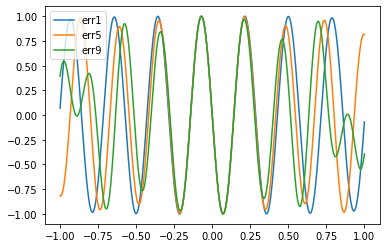

In [37]:
psi0 = psi(0.0, 1.0)
q = 1.0
Delta = 0.0
Omega01 = 1.0
Omega02 = q*Omega01
t1 = np.pi/(2.0*Omega01)
T = 20.0/Omega01
t2 = 9.0*np.pi/(2.0*Omega01)
tol = 1.0e-10

pts = 1000
delds = np.linspace(-1.0, 1.0, pts)
errSigPts1 = np.zeros(pts,)
errSigPts5 = np.zeros(pts,)
errSigPts9 = np.zeros(pts,)
RhoeeM = np.zeros(pts,)
RhoeeP = np.zeros(pts,)
dif = np.zeros(pts,)
for ii in range(pts):
    RhoeeM[ii] = rhoee(hyperRamseyM(psi0, t1, T, t2, delds[ii], delds[ii]+Delta, Omega01, Omega02))
    RhoeeP[ii] = rhoee(hyperRamseyP(psi0, t1, T, t2, delds[ii], delds[ii]+Delta, Omega01, Omega02))
    errSigPts1[ii] = HRerrSig(psi0, t1, T, np.pi/2.0, delds[ii], delds[ii]+Delta, Omega01, Omega02)
    errSigPts5[ii] = HRerrSig(psi0, t1, T, 5.0*np.pi/2.0, delds[ii], delds[ii]+Delta, Omega01, Omega02)
    errSigPts9[ii] = HRerrSig(psi0, t1, T, 9.0*np.pi/2.0, delds[ii], delds[ii]+Delta, Omega01, Omega02)

    
plt.plot(delds,errSigPts1, label = "err1")
plt.plot(delds,errSigPts5, label = "err5")
plt.plot(delds,errSigPts9, label = "err9")
#plt.plot(delds,RhoeeM, label="m")
#plt.plot(delds, RhoeeP, label="p")
#plt.plot([0.0], [0.0], marker="x", markerfacecolor="red", markersize=10)
#plt.plot([HRfindRoot(psi0, t1, T, t2, Delta, Omega01, Omega02, tol, 0.0)],[0.0], marker="x", markerfacecolor="red", markersize=10)
plt.legend()
plt.show()

In [15]:
pts = 501
qPts = np.linspace(0.7, 1.3, pts)
heatSens1 = np.zeros(pts,)
heatSens3 = np.zeros(pts,)
heatSens5 = np.zeros(pts,)
heatSens7 = np.zeros(pts,)
heatSensJ = np.zeros(pts,)
heatSensJ2 = np.zeros(pts,)


for ii in range(pts):
    heatSens1[ii] = HRHeatingSensitivity(qPts[ii], np.pi/2.0, 1.0*np.pi/2.0)
    heatSens3[ii] = HRHeatingSensitivity(qPts[ii], np.pi/2.0, 3.0*np.pi/2.0)
    heatSens5[ii] = HRHeatingSensitivity(qPts[ii], np.pi/2.0, 5.0*np.pi/2.0)
    heatSens7[ii] = HRHeatingSensitivity(qPts[ii], np.pi/2.0, 7.0*np.pi/2.0)
    heatSensJ[ii] = HRJumpHeatingSensitivity(qPts[ii])
    heatSensJ2[ii] = HRJump2HeatingSensitivity(qPts[ii])

    
heatSens1 = heatSens1 #- HRHeatingSensitivity(1.0, np.pi/2.0, 1.0*np.pi/2.0)
heatSens3 = heatSens3 #- HRHeatingSensitivity(1.0, np.pi/2.0, 3.0*np.pi/2.0)
heatSens5 = heatSens5 #- HRHeatingSensitivity(1.0, np.pi/2.0, 5.0*np.pi/2.0)
heatSens7 = heatSens7 #- HRHeatingSensitivity(1.0, np.pi/2.0, 7.0*np.pi/2.0)
heatSensJ = heatSensJ #- HRJumpHeatingSensitivity(1.0)
heatSensJ2 = heatSensJ2 #- HRJump2HeatingSensitivity(1.0)

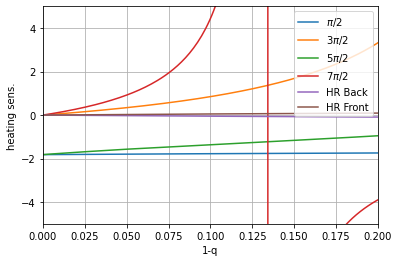

In [44]:
pts = 501
qPts = np.linspace(0.7, 1.3, pts)
plt.plot(1-qPts, heatSens1, label="$\pi/2$")
plt.plot(1-qPts, heatSens3, label="$3\pi/2$")
plt.plot(1-qPts, heatSens5, label="$5\pi/2$")
plt.plot(1-qPts, heatSens7, label="$7\pi/2$")
plt.plot(1-qPts, heatSensJ, label="HR Back")
plt.plot(1-qPts, heatSensJ2, label="HR Front")
plt.xlabel("1-q")
plt.ylabel("heating sens.")
plt.ylim([-5, 5])
plt.xlim([0.0, 0.2])
plt.grid()
plt.legend()
plt.show()

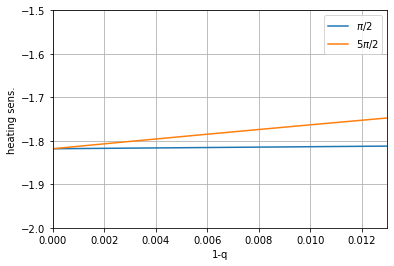

In [17]:
plt.plot(1-qPts, heatSens1, label="$\pi/2$")
#plt.plot(1-qPts, heatSens3, label="$3\pi/2$")
plt.plot(1-qPts, heatSens5, label="$5\pi/2$")
#plt.plot(1-qPts, heatSens7, label="$7\pi/2$")
#plt.plot(1-qPts, heatSensJ, label="HR Back")
#plt.plot(1-qPts, heatSensJ2, label="HR Front")
plt.xlabel("1-q")
plt.ylabel("heating sens.")
plt.ylim([-2, -1.5])
plt.xlim([0.0, 0.013])
plt.grid()
plt.legend()
plt.show()

In [18]:
pts = 501
heatSens9 = np.zeros(pts,)
for ii in range(pts):
    heatSens9[ii] = HRHeatingSensitivity(qPts[ii], np.pi/2.0, 9.0*np.pi/2.0)

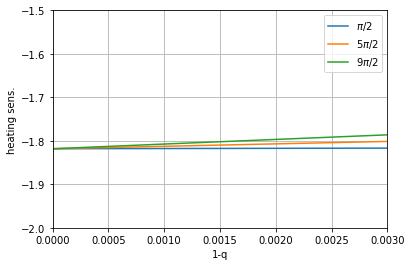

In [19]:
plt.plot(1-qPts, heatSens1, label="$\pi/2$")
plt.plot(1-qPts, heatSens5, label="$5\pi/2$")
plt.plot(1-qPts, heatSens9, label="$9\pi/2$")
plt.xlabel("1-q")
plt.ylabel("heating sens.")
plt.ylim([-2, -1.5])
plt.xlim([0.0, 0.003])
plt.grid()
plt.legend()
plt.show()

Now a different heating sensitivity function where, for a given LSEE $\Delta = 0.0001\Omega_0$, I plot the clock shift times dark time divided by the detuning against $1-q$.

In [48]:
pts = 101
qPts = np.linspace(0.7, 1.3, pts)
heatSens1b = np.zeros(pts,)
heatSens3b = np.zeros(pts,)
heatSens5b = np.zeros(pts,)
heatSens7b = np.zeros(pts,)
heatSensJb = np.zeros(pts,)
heatSensJ2b = np.zeros(pts,)
Delta = 0.0001

for ii in range(pts):
    heatSens1b[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 1.0*np.pi/2.0, Delta)
    heatSens3b[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 3.0*np.pi/2.0, Delta)
    heatSens5b[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 5.0*np.pi/2.0, Delta)
    heatSens7b[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 7.0*np.pi/2.0, Delta)
    heatSensJb[ii] = HRJumpHeatSensb(qPts[ii], Delta)
    heatSensJ2b[ii] = HRJump2HeatSensb(qPts[ii], Delta)
    print(qPts[ii])

0.7
0.706
0.712
0.718
0.724
0.73
0.736
0.742
0.748
0.754
0.76
0.766
0.772
0.778
0.784
0.7899999999999999
0.7959999999999999
0.8019999999999999
0.8079999999999999
0.814
0.82
0.826
0.832
0.838
0.844
0.85
0.856
0.862
0.868
0.874
0.88
0.886
0.892
0.898
0.904
0.91
0.9159999999999999
0.9219999999999999
0.9279999999999999
0.9339999999999999
0.94
0.946
0.952
0.958
0.964
0.97
0.976
0.982
0.988
0.994
1.0
1.006
1.012
1.018
1.024
1.03
1.036
1.042
1.048
1.054
1.06
1.066
1.072
1.078
1.084
1.09
1.096
1.102
1.108
1.114
1.12
1.126
1.1320000000000001
1.138
1.1440000000000001
1.15
1.1560000000000001
1.162
1.1680000000000001
1.174
1.1800000000000002
1.186
1.1920000000000002
1.198
1.2040000000000002
1.21
1.2160000000000002
1.222
1.2280000000000002
1.234
1.24
1.246
1.252
1.258
1.264
1.27
1.276
1.282
1.288
1.294
1.3


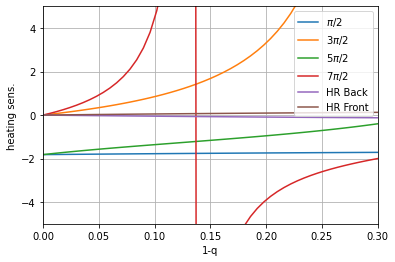

In [52]:
pts = 101
qPts = np.linspace(0.7, 1.3, pts)
plt.plot(1-qPts, heatSens1b, label="$\pi/2$")
plt.plot(1-qPts, heatSens3b, label="$3\pi/2$")
plt.plot(1-qPts, heatSens5b, label="$5\pi/2$")
plt.plot(1-qPts, heatSens7b, label="$7\pi/2$")
plt.plot(1-qPts, heatSensJb, label="HR Back")
plt.plot(1-qPts, heatSensJ2b, label="HR Front")
plt.xlabel("1-q")
plt.ylabel("heating sens.")
plt.ylim([-5, 5])
plt.xlim([0.0, 0.3])
plt.grid()
plt.legend()
plt.show()

In [47]:
pts = 101
qPts = np.linspace(0.7, 1.3, pts)
heatSens1b = np.zeros(pts,)
heatSens3b = np.zeros(pts,)
heatSens5b = np.zeros(pts,)
heatSens7b = np.zeros(pts,)
heatSensJb = np.zeros(pts,)
heatSensJ2b = np.zeros(pts,)
Delta = 0.01

for ii in range(pts):
    heatSens1b[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 1.0*np.pi/2.0, Delta)
    heatSens3b[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 3.0*np.pi/2.0, Delta)
    heatSens5b[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 5.0*np.pi/2.0, Delta)
    heatSens7b[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 7.0*np.pi/2.0, Delta)
    heatSensJb[ii] = HRJumpHeatSensb(qPts[ii], Delta)
    heatSensJ2b[ii] = HRJump2HeatSensb(qPts[ii], Delta)
    print(qPts[ii])

0.7
0.706
0.712
0.718
0.724
0.73
0.736
0.742
0.748
0.754
0.76
0.766
0.772
0.778
0.784
0.7899999999999999
0.7959999999999999
0.8019999999999999
0.8079999999999999
0.814
0.82
0.826
0.832
0.838
0.844
0.85
0.856
0.862
0.868
0.874
0.88


KeyboardInterrupt: 

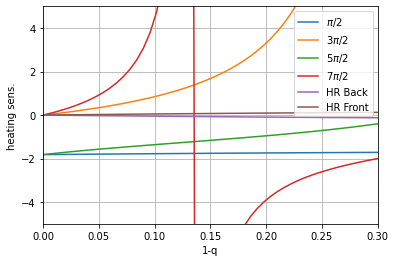

In [55]:
pts = 101
qPts = np.linspace(0.7, 1.3, pts)
plt.plot(1-qPts, heatSens1b, label="$\pi/2$")
plt.plot(1-qPts, heatSens3b, label="$3\pi/2$")
plt.plot(1-qPts, heatSens5b, label="$5\pi/2$")
plt.plot(1-qPts, heatSens7b, label="$7\pi/2$")
plt.plot(1-qPts, heatSensJb, label="HR Back")
plt.plot(1-qPts, heatSensJ2b, label="HR Front")
plt.xlabel("1-q")
plt.ylabel("heating sens.")
plt.ylim([-5, 5])
plt.xlim([0.0, 0.3])
plt.grid()
plt.legend()
plt.show()